In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
from sklearn.metrics import classification_report

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set


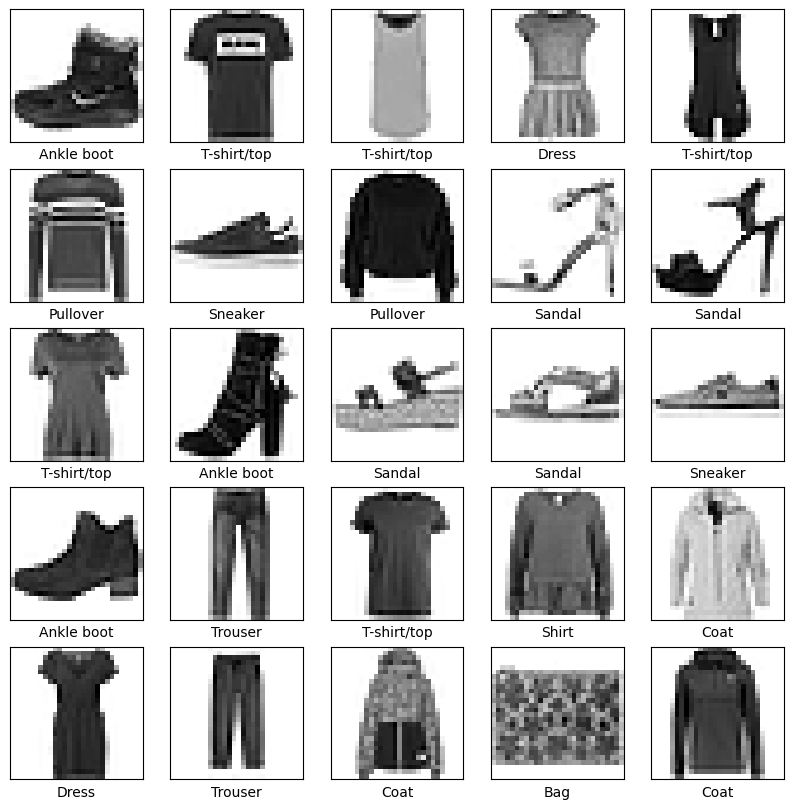

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), input_shape=(28,28,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax'),
    ])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

In [6]:
EPOCHS = 50
BATCH_SIZE=512

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)

Epoch 1/50
94/94 [==============================] - 84s 867ms/step - loss: 0.6430 - accuracy: 0.7823 - val_loss: 3.4105 - val_accuracy: 0.1155
Epoch 2/50
94/94 [==============================] - 79s 842ms/step - loss: 0.3576 - accuracy: 0.8690 - val_loss: 4.2834 - val_accuracy: 0.1058
Epoch 3/50
94/94 [==============================] - 72s 768ms/step - loss: 0.2984 - accuracy: 0.8920 - val_loss: 3.2772 - val_accuracy: 0.1612
Epoch 4/50
94/94 [==============================] - 79s 844ms/step - loss: 0.2630 - accuracy: 0.9024 - val_loss: 2.0448 - val_accuracy: 0.5063
Epoch 5/50
94/94 [==============================] - 80s 853ms/step - loss: 0.2414 - accuracy: 0.9111 - val_loss: 1.0134 - val_accuracy: 0.6938
Epoch 6/50
94/94 [==============================] - 77s 819ms/step - loss: 0.2217 - accuracy: 0.9181 - val_loss: 0.4744 - val_accuracy: 0.8322
Epoch 7/50
94/94 [==============================] - 70s 744ms/step - loss: 0.2039 - accuracy: 0.9248 - val_loss: 0.2844 - val_accuracy: 0.9000

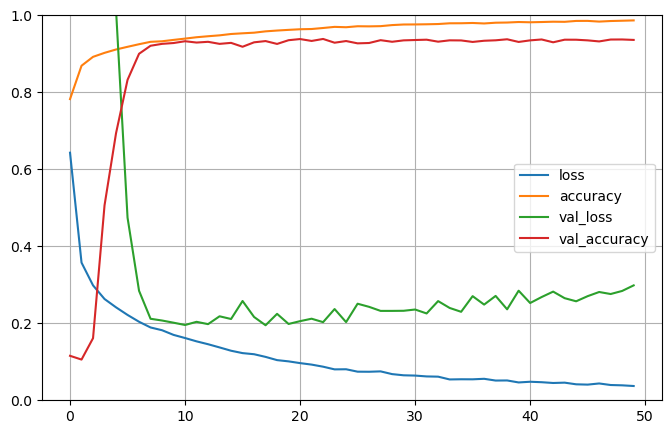

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [8]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {train_loss:.4f}")
print(f"Train accuracy: {train_accuracy:.4f}")

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

1875/1875 [==============================] - 38s 20ms/step - loss: 0.0684 - accuracy: 0.9843
Train loss: 0.0684
Train accuracy: 0.9843
313/313 [==============================] - 6s 18ms/step - loss: 0.3494 - accuracy: 0.9286
Test loss: 0.3494
Test accuracy: 0.9286


313/313 [==============================] - 6s 18ms/step


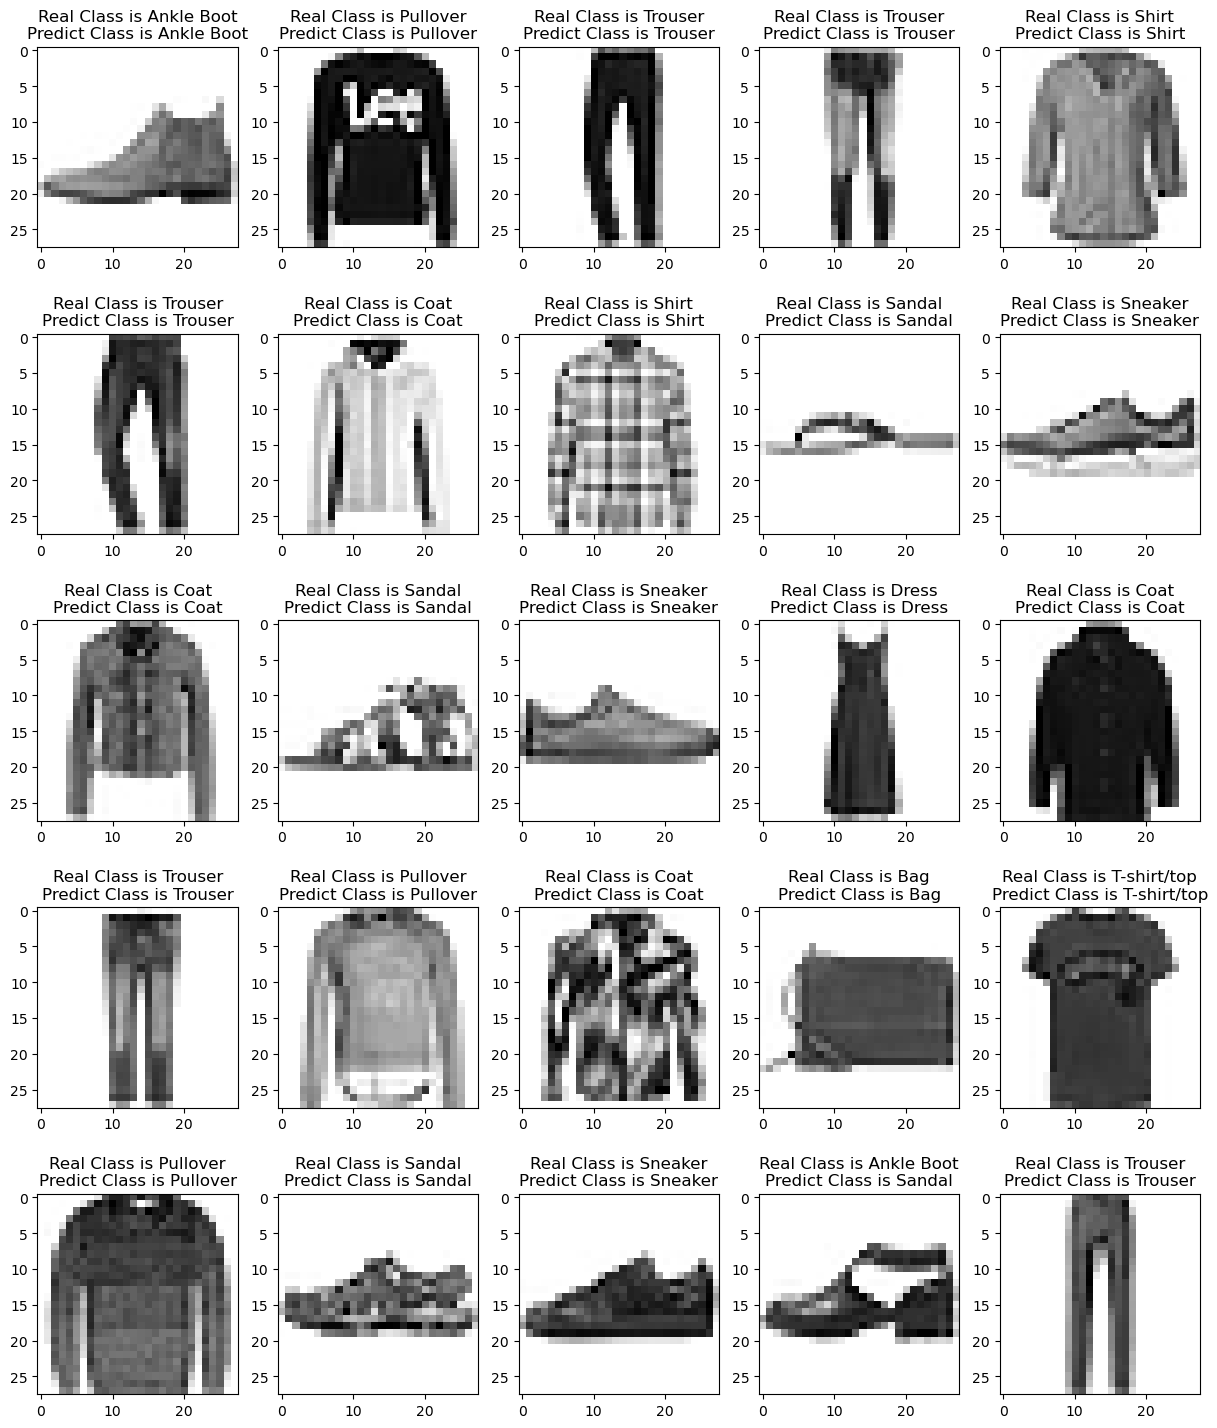

In [9]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(x_test)
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(5, 5, figsize=(15, 18))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='binary')
    ax.set(title = f"Real Class is {labels[y_test[i].argmax()]}\nPredict Class is {labels[y_pred[i].argmax()]}")

In [10]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.83      0.87      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.91      0.88      0.90      1000
       Dress       0.93      0.94      0.93      1000
        Coat       0.84      0.93      0.89      1000
      Sandal       0.99      0.99      0.99      1000
       Shirt       0.79      0.79      0.79      1000
     Sneaker       0.96      0.98      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.99      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

